<a href="https://colab.research.google.com/github/angrybird05/pyTorch/blob/main/Neural_networks_cassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural Networks classification

In [ ]:
#1.making classification dataset
import sklearn
from sklearn.datasets import make_circles

#making samples
n_samples = 1000

#create circles
X,y = make_circles(n_samples,
                       noise = 0.03,
                       random_state =42)

len(X),len(y)

(1000, 1000)

In [ ]:
print(f"X[:5] : {X[:5]}")
print(f"y[:5] : {y[:5]}")

X[:5] : [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
y[:5] : [1 1 1 1 0]


In [ ]:
#make data frame as circle data
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],
                       "X1":X[:,1],
                       "label":y})
circles.head(10)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


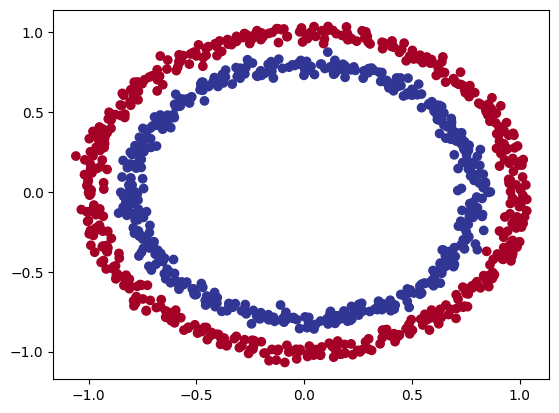

In [ ]:
#graphycal representation
import matplotlib.pyplot as plt
plt.scatter(x = circles["X0"],
           y = circles["X1"],
           c = circles["label"],
           cmap = plt.cm.RdYlBu);

In [ ]:
#checking input and output shapes
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
#Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


In [ ]:
# spliting data into traning and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,
                                                  y,
                                                  test_size=0.2)
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

  Building the model
  

In [ ]:
#Building the model
import torch
from torch import nn
#setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

#constructing a model using sunclassing nn.module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()

        # create nn.layers capable of handlig=ng shapes of data

        self.layer_1 = nn.Linear(in_features=2,out_features=10) # takes in 2 features and upscales to 10 features

        self.layer_2 = nn.Linear(in_features=10,out_features=1) #takes in 10 features from previos layer and outputs a single feature (same shape as y)

        self.relu = nn.ReLU() # Add ReLU activation function

         # define forward method that outline the forward pass

def forward(self,x):
            return self.layer_2(self.relu(self.layer_1(x))) #X  -> layer -1 -> ReLU -> layer_2 -> output

#instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
#Replicate the model using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=10),
    nn.ReLU(), # Add ReLU activation function
    nn.Linear(in_features=10,out_features=1)
)
model_0.to(device)
model_0


Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1918,  0.2976],
                      [ 0.6313,  0.4087],
                      [-0.3091,  0.4082],
                      [ 0.1265,  0.3591],
                      [-0.4310, -0.7000],
                      [-0.2732, -0.5424],
                      [ 0.5802,  0.2037],
                      [ 0.2929,  0.2236],
                      [-0.0123,  0.5534],
                      [-0.5024,  0.0445]])),
             ('0.bias',
              tensor([-0.4826,  0.2180, -0.2435,  0.2167, -0.1473,  0.5865, -0.4191, -0.4217,
                      -0.4217,  0.6360])),
             ('2.weight',
              tensor([[ 0.1054,  0.3043, -0.2610, -0.3137, -0.2474, -0.2127,  0.1281,  0.1132,
                        0.2628, -0.1633]])),
             ('2.bias', tensor([-0.2156]))])

In [ ]:
# making predections with the model

with torch.inference_mode():
 untrained_preds = model_0(X_test.to(device))
print(f"length of preds : {len(untrained_preds)}")
print(f"shape of preds : {untrained_preds.shape}")
print(f"first 10 preds : {untrained_preds[:10]}")
print(f"first 10 labels : {y_test[:10]}")

length of preds : 200
shape of preds : torch.Size([200, 1])
first 10 preds : tensor([[-0.3212],
        [-0.4978],
        [-0.3417],
        [-0.6147],
        [-0.1382],
        [-0.1886],
        [-0.1081],
        [-0.6234],
        [-0.2004],
        [-0.2588]])
first 10 labels : tensor([1., 1., 1., 1., 0., 1., 0., 1., 0., 1.])


In [ ]:
## seetup loss function and optimizer

## for loss function use "torch.nn.BECWithLogiitsLoss()"
loss_fn = nn.BCEWithLogitsLoss() #has sigmoid  activation built in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)

## calculate acurracy
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc


In [ ]:
## Traning the model
torch.manual_seed(42)

epochs = 4000

#forward pass
for epoch in range(epochs):
    model_0.train() # Put model in training mode
    # 1. Forward pass
    y_logits = model_0(X_train.to(device)) # y_logits shape: (batch_size, 1) e.g., (800, 1)

    # 2. Convert logits to prediction probabilities then to labels
    y_pred = torch.round(torch.sigmoid(y_logits)) # y_pred shape: (batch_size, 1)

    # 3. Calculate loss
    # y_train is (800,), but loss_fn expects (800, 1) if y_logits is (800, 1)
    loss = loss_fn(y_logits, y_train.to(device).unsqueeze(1)) # Reshape y_train to (800, 1)

    # 4. Calculate accuracy
    # y_train is (800,), y_pred is (800, 1). Ensure y_train is also (800, 1) for comparison
    acc = accuracy_fn(y_train.to(device).unsqueeze(1), y_pred) # Pass reshaped y_train and y_pred

    # 5. Optimizer zero grad
    optimizer.zero_grad()

    # 6. Backward pass
    loss.backward()

    # 7. Optimizer step
    optimizer.step()


In [ ]:
import torch

# Put the model in evaluation mode
model_0.eval()

# Make predictions on the test data
with torch.inference_mode():
    test_logits = model_0(X_test.to(device))
    test_pred_probs = torch.sigmoid(test_logits)
    test_pred_labels = torch.round(test_pred_probs)

# Calculate loss on the test set
test_loss = loss_fn(test_logits, y_test.to(device).unsqueeze(1))

# Calculate accuracy on the test set
test_acc = accuracy_fn(y_test.to(device).unsqueeze(1), test_pred_labels)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.2f}%")
print(f"\nFirst 10 test predictions (probabilities):\n{test_pred_probs[:10].squeeze()}")
print(f"First 10 test predictions (labels):\n{test_pred_labels[:10].squeeze()}")
print(f"First 10 actual test labels:\n{y_test[:10]}")


Test Loss: 0.0184
Test Accuracy: 100.00%

First 10 test predictions (probabilities):
tensor([9.9996e-01, 9.9996e-01, 9.8517e-01, 9.9836e-01, 5.9615e-04, 9.9263e-01,
        1.4481e-04, 9.9989e-01, 1.3361e-04, 9.9991e-01])
First 10 test predictions (labels):
tensor([1., 1., 1., 1., 0., 1., 0., 1., 0., 1.])
First 10 actual test labels:
tensor([1., 1., 1., 1., 0., 1., 0., 1., 0., 1.])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_predictions(model, X, y, title="Model Decision Boundary"): # Function to plot decision boundaries
    model.to("cpu") # Move model to CPU for plotting
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and make predictions
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Make features for prediction
    X_to_predict_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_predict_on)

    if model.training == False: # if the model is in eval mode, use sigmoid
        y_pred = torch.round(torch.sigmoid(y_logits)).squeeze()
    else: # otherwise, use raw logits (as nn.BCEWithLogitsLoss expects raw logits)
        y_pred = torch.round(y_logits).squeeze()

    y_pred = y_pred.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel("X0")
    plt.ylabel("X1")
    plt.show()


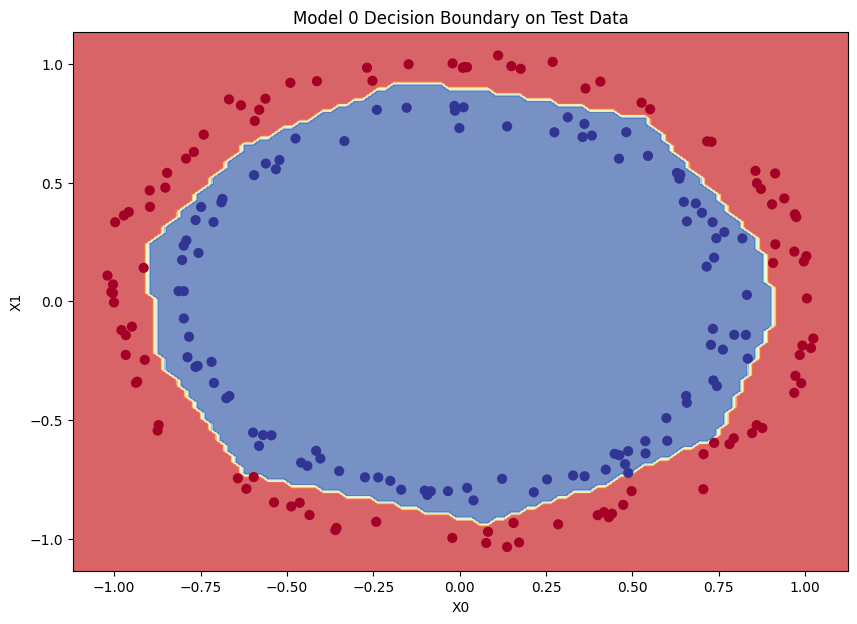

In [ ]:
# Plot the decision boundary for the trained model
plot_predictions(model_0, X_test, y_test, title="Model 0 Decision Boundary on Test Data")
